In [96]:
"""The purpose of this document is to quickly analyze the main datapoints of a new test run csv file."""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file = "data/L230216.CSV"
# file = "data/L230217.CSV"
# file = "data/L230303.CSV"

df_raw = pd.read_csv(file)

/tmp/ipykernel_1036/627856772.py:11: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(file)


In [97]:
col = ['Date', 'Time', 'Lat', 'Lon', 'Speed m/s', 'Distance km',
        'RPM 1', 'Motor Load 1 %', 'Motor Torque 1 %', 'Motor Temp 1 C',
        'Pack Current 1 A', 'Pack Voltage 1 V', 'Pack Temp 1 C', 'SOC 1 %']

df = df_raw[col]

[269, 4539]


/tmp/ipykernel_1036/769808102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(header_ind, inplace=True)
/tmp/ipykernel_1036/769808102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col])


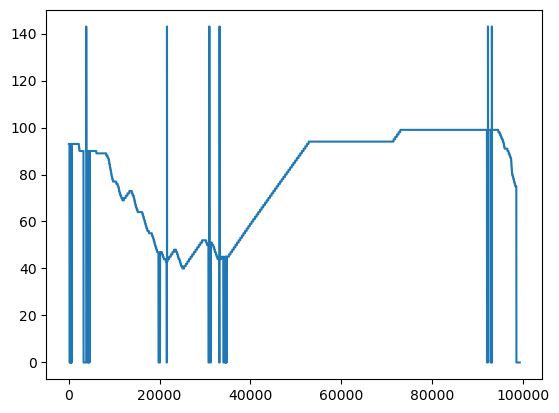

In [98]:
header_ind = df[df['Lat']=='Lat'].index.tolist()
print(header_ind)
df.drop(header_ind, inplace=True)
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col])

plt.plot(df.index, df['SOC 1 %'])

/tmp/ipykernel_1036/2451555504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(removed_rows, inplace=True)


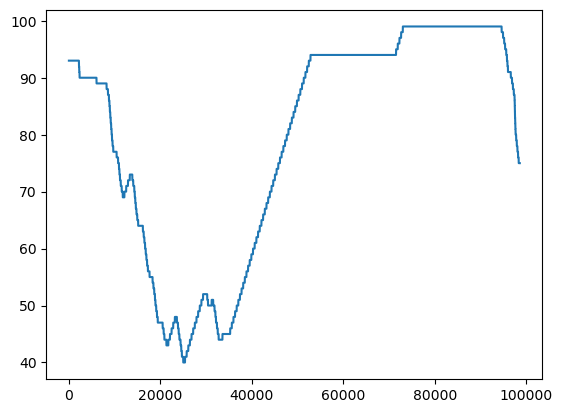

In [99]:
'''Remove outliers'''
high_charge = df[df['SOC 1 %']>100].index.tolist()
low_charge = df[df['SOC 1 %']<3].index.tolist()
removed_rows = high_charge+low_charge
df.drop(removed_rows, inplace=True)

plt.plot(df.index, df['SOC 1 %'])

In [100]:
'''Check time is 1 second apart'''
# df = pd.to_datetime(df['Time'], format = "%H:%M:%S")

# s_ind = [1]
# for i in range(1, len(df)):
#     time_diff = df['Time'].iloc[i] - df['Time'].iloc[i-1]
#     s_ind.append(time_diff.seconds)
# df['Time_Diff'] = s_ind

slopes = [0]
for i in range(1, len(df)):
    slope = df['SOC 1 %'].iloc[i] - df['SOC 1 %'].iloc[i-1]
    slopes.append(slope)
df['Slopes'] = slopes

/tmp/ipykernel_1036/2956813929.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Slopes'] = slopes


In [ ]:
runs_dict = {}

cnt = 0
start = 0
for i in range(start, len(df)):
    
    if df['Time_Diff'].iloc[i]==1:
        list.append(i)
    elif df['Time_Diff'].iloc[i]>1:
        cnt+=1
        run = 'Run %d' % (cnt)
        runs_dict[run] = df.iloc[list]
        list = []
        start = i